<a href="https://colab.research.google.com/github/AnthonyNama/Notebook1/blob/master/Copie_de_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

In [2]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     20000 non-null  int64  
 1   given_name     19560 non-null  object 
 2   surname        19575 non-null  object 
 3   street_number  19618 non-null  float64
 4   address_1      19204 non-null  object 
 5   suburb         19788 non-null  object 
 6   postcode       19801 non-null  object 
 7   state          18010 non-null  object 
 8   date_of_birth  17989 non-null  float64
 9   age            16003 non-null  float64
 10  phone_number   19081 non-null  object 
 11  address_2      7893 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.8+ MB


In [3]:
df_patient.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None


In [4]:
df_pcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  8800 non-null   int64 
 1   pcr         8800 non-null   object
dtypes: int64(1), object(1)
memory usage: 137.6+ KB


In [5]:
df_pcr.head()

,patient_id,pcr
0,653091,N
1,347667,Negative
2,708481,Positive
3,148825,Negative
4,150081,Negative


In [6]:
df_patient = df_patient.dropna()

In [7]:
df_pcr = df_pcr.dropna()

In [8]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4267 entries, 0 to 19986
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     4267 non-null   int64  
 1   given_name     4267 non-null   object 
 2   surname        4267 non-null   object 
 3   street_number  4267 non-null   float64
 4   address_1      4267 non-null   object 
 5   suburb         4267 non-null   object 
 6   postcode       4267 non-null   object 
 7   state          4267 non-null   object 
 8   date_of_birth  4267 non-null   float64
 9   age            4267 non-null   float64
 10  phone_number   4267 non-null   object 
 11  address_2      4267 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 433.4+ KB


In [9]:
df_pcr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  8800 non-null   int64 
 1   pcr         8800 non-null   object
dtypes: int64(1), object(1)
memory usage: 206.2+ KB


In [10]:
print(df_patient.isnull().sum(axis = 0))

patient_id       0
given_name       0
surname          0
street_number    0
address_1        0
suburb           0
postcode         0
state            0
date_of_birth    0
age              0
phone_number     0
address_2        0
dtype: int64


In [11]:
df_patient.dropna(axis = 0, inplace = True)

In [12]:
df_patient.columns

Index(['patient_id', 'given_name', 'surname', 'street_number', 'address_1',
       'suburb', 'postcode', 'state', 'date_of_birth', 'age', 'phone_number',
       'address_2'],
      dtype='object')

In [13]:
df_pcr.columns

Index(['patient_id', 'pcr'], dtype='object')

In [14]:
df_patient.shape

(4267, 12)

In [15]:
df_pcr.shape

(8800, 2)

In [16]:
data_comb = pd.merge(df_patient, df_pcr, on = 'patient_id')

In [17]:
data_comb.shape

(1896, 13)

In [18]:
data_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     1896 non-null   int64  
 1   given_name     1896 non-null   object 
 2   surname        1896 non-null   object 
 3   street_number  1896 non-null   float64
 4   address_1      1896 non-null   object 
 5   suburb         1896 non-null   object 
 6   postcode       1896 non-null   object 
 7   state          1896 non-null   object 
 8   date_of_birth  1896 non-null   float64
 9   age            1896 non-null   float64
 10  phone_number   1896 non-null   object 
 11  address_2      1896 non-null   object 
 12  pcr            1896 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 207.4+ KB


In [19]:
data_comb.drop("date_of_birth", axis=1, inplace=True)

In [20]:
data_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     1896 non-null   int64  
 1   given_name     1896 non-null   object 
 2   surname        1896 non-null   object 
 3   street_number  1896 non-null   float64
 4   address_1      1896 non-null   object 
 5   suburb         1896 non-null   object 
 6   postcode       1896 non-null   object 
 7   state          1896 non-null   object 
 8   age            1896 non-null   float64
 9   phone_number   1896 non-null   object 
 10  address_2      1896 non-null   object 
 11  pcr            1896 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 192.6+ KB


In [21]:
data_comb['pcr'].replace(['P'], 'Positive', inplace=True)
data_comb['pcr'].replace(['N'], 'Negative', inplace=True)

In [22]:
data_comb

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,age,phone_number,address_2,pcr
0,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,34.0,02 97793152,foxdown,Negative
1,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,31.0,03 15575583,dhurringill,Positive
2,517113,trey,glass,27.0,mugga way,carnegie,5093,nsw,21.0,08 08091408,blackridge flyfishing school,Negative
3,996942,zachary,piazza,772.0,beaney street,manunda,2223,sa,25.0,02 36108470,rsd frareen,Negative
4,323165,taylor,binns,2.0,dunbar street,mount annan,4455,wa,11.0,08 99185004,sec 528,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1891,444199,matthew,roebuck,44.0,fuhrman street,tea tree gully,6112,wa,36.0,03 12751519,greenbank,Negative
1892,124956,marleigh,seen,11.0,crisp circuit,lavington,2640,sa,27.0,04 65522089,stoneyhurst,Negative
1893,513727,kane,costigan,1.0,stonehaven crescent,shenton park,2203,nsw,22.0,04 55808760,townview,Negative
1894,230775,victoria,whiteley,12.0,beasley street,landsborough,2388,nsw,30.0,03 68108604,ponderosa,Positive


In [23]:
all_state_count=data_comb['state'].value_counts().to_frame().reset_index().rename(columns={'index':'STATE','state':'count'})

In [24]:
%matplotlib inline
from matplotlib import pyplot
import plotly
import plotly.offline as py
#from plotly import graph_objs as go
import plotly.graph_objects as go

In [25]:
df_state = data_comb['state']

In [26]:
data_im = pd.DataFrame(data_comb['state'],data_comb['pcr'])

In [27]:
df_pcr = data_comb['pcr']

In [28]:
data_comb_group = data_comb.groupby(['state','pcr'], as_index=False)['patient_id'].count()

In [29]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data_comb_group['state'],
    y=data_comb_group['patient_id'],
    name='Positive',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data_comb_group['state'],
    y=data_comb_group['patient_id'],
    name='Negative',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [30]:
df_positive = data_comb[data_comb['pcr']=='Positive'].groupby('state',as_index=False)['patient_id'].sum()
df_negative = data_comb[data_comb['pcr']=='Negative'].groupby('state',as_index=False)['patient_id'].sum()

In [31]:
all_pcr_count=data_comb['pcr'].value_counts().to_frame().reset_index().rename(columns={'index':'PCR','pcr':'count'})

In [32]:
all_pcr_count

,PCR,count
0,Negative,1415
1,Positive,481


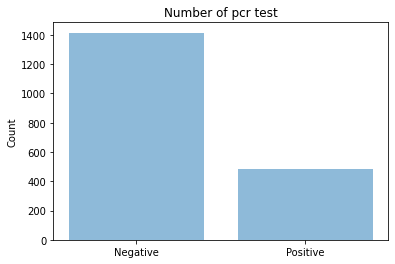

In [33]:
import matplotlib.pyplot as plt
import numpy as np
performance = all_pcr_count['count']
y_pos = np.arange(len(all_pcr_count['count']))
plt.bar(all_pcr_count['PCR'], performance, align='center', alpha=0.5)
plt.xticks(y_pos, all_pcr_count['PCR'])
plt.ylabel('Count')
plt.title('Number of pcr test')
plt.show()

In [34]:
data_comb_group = data_comb.groupby(['state','pcr'], as_index=False)['patient_id'].count()

In [35]:
data_comb_group[data_comb_group['pcr']=='Negative']

,state,pcr,patient_id
0,act,Negative,18
2,ai,Negative,1
3,ndw,Negative,1
4,nfsw,Negative,1
6,ns,Negative,1
9,nsn,Negative,1
10,nsw,Negative,509
12,nt,Negative,16
14,qld,Negative,269
17,sa,Negative,91


In [36]:
df_positive = data_comb_group[data_comb_group['pcr']=='Positive'].groupby('state',as_index=False)['patient_id'].sum()
df_negative = data_comb_group[data_comb_group['pcr']=='Negative'].groupby('state',as_index=False)['patient_id'].sum()

In [37]:
fig = go.Figure()

df_positive = data_comb_group[data_comb_group['pcr']=='Positive'].groupby('state',as_index=False)['patient_id'].sum()
df_negative = data_comb_group[data_comb_group['pcr']=='Negative'].groupby('state',as_index=False)['patient_id'].sum()
fig.add_trace(go.Bar(name='Positive', x=df_positive['state'][:10], y=df_positive['patient_id'][:10] ,marker_color='blue', marker={'color': df_positive['patient_id'][:10], 
    'colorscale': 'blues'}, textposition = "outside",))
fig.add_trace(go.Bar(name='Negative', x=df_negative['state'][:10], y=df_negative['patient_id'][:10] ,marker_color='red', marker={'color': df_negative['patient_id'][:10], 
    'colorscale': 'blues'}, textposition = "outside",))

fig.update_layout(barmode='group', xaxis_tickangle=-45, height=700,title_x=0.5)
fig.show()

In [38]:
all_pcr_count=data_comb['pcr'].value_counts().to_frame().reset_index().rename(columns={'index':'PCR','pcr':'count'})

import plotly.graph_objects as go
fig = go.Figure(go.Bar(
    x=all_pcr_count['PCR'][:10],y=all_pcr_count['count'][:10],
    marker={'color': all_pcr_count['count'][:10], 
    'colorscale': 'blues'},  
    text=all_pcr_count['count'][:10],
    textposition = "outside",
))
fig.update_layout(title_text='Top pcr',xaxis_title="type of test",
                  yaxis_title="Number of Test", template="plotly_dark", height=700,title_x=0.5)
fig.show()

In [39]:
fig = go.Figure(go.Bar(
    x=all_state_count['STATE'][:10],y=all_state_count['count'][:10],
    marker={'color': all_state_count['count'][:10], 
    'colorscale': 'blues'},  
    text=all_state_count['count'][:10],
    textposition = "outside",
))
fig.update_layout(title_text='Top states with most tweets',xaxis_title="state",
                  yaxis_title="Number of Tweets",template="plotly_dark",height=700,title_x=0.5)
fig.show()

In [40]:


data_comb_group_1 = data_comb.groupby(['age','state','pcr'], as_index=False)['patient_id'].count()



In [41]:
fig = go.Figure()

df_positive_1 = data_comb_group_1[data_comb_group_1['pcr']=='Positive'].groupby('age',as_index=False)['patient_id'].sum()
df_negative_1 = data_comb_group_1[data_comb_group_1['pcr']=='Negative'].groupby('age',as_index=False)['patient_id'].sum()
fig.add_trace(go.Bar(name='Positive', x=df_positive_1['age'], y=df_positive_1['patient_id'], marker_color='blue'))
fig.add_trace(go.Bar(name='Negative', x=df_negative_1['age'], y=df_negative_1['patient_id'], marker_color='red'))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()